In [2]:
from numpy import * # because arrays are defined in numpy

def Mand(z0, max_steps):
    z = 0j  # no need to specify type. 
    # To initialize to complex number, just assign 0j==i*0
    for itr in range(max_steps):
        if abs(z)>2:
            return itr
        z = z*z + z0
    return max_steps


def Mandelbrot(ext, Nxy, max_steps):
    """
    ext[4]    -- array of 4 values [min_x,max_x,min_y,max_y]
    Nxy       -- int number of points in x and y direction
    max_steps -- how many steps we will try at most before we conclude the point is in the set
    """
    data = zeros((Nxy,Nxy)) # initialize a 2D dynamic array
    for i in range(Nxy):
        for j in range(Nxy):
            x = ext[0] + (ext[1]-ext[0])*i/(Nxy-1.)
            y = ext[2] + (ext[3]-ext[2])*j/(Nxy-1.)
            # creating complex number of the fly
            data[i,j] = Mand(x + y*1j, max_steps)  
    return data
# data now contains integers. 
# MandelbrotSet has value 1000, and points not in the set have value <1000.

In [3]:
data = Mandelbrot([-2,1,-1,1], 500, 1000)

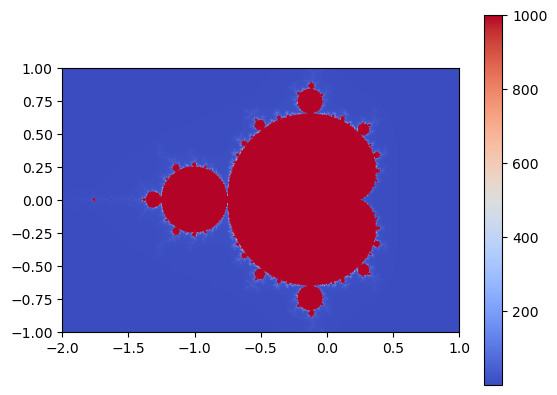

In [4]:
from pylab import *    # plotting library
%matplotlib inline

ext=[-2,1,-1,1]
# pylab's function for displaying 2D image
imshow(transpose(data), extent=ext, origin='lower', cmap=cm.coolwarm)  #extent is for stretching bounds as per the length of the axes
colorbar()
show()

In [10]:
# plt.show() for plot without the colorbar

In [5]:
import time            # timeing
t0 = time.time()
data = Mandelbrot([-2,1,-1,1], 1000, 1000)
t1 = time.time()
print ('clock time: ',t1-t0,'s')

clock time:  51.43808889389038 s


In [6]:
from numpy import * # because arrays are defined in numpy
from numba import njit  # This is the new line with numba, njit creates a non python compiled version of the function

#numba is a just in time compiler for python. It is a decorator that can be used to compile a function to a non-python version (in LLMV - a low level language).
@njit   # this is an alias for @jit(nopython=True)
def Mand(z0, max_steps):
    z = 0j  # no need to specify type. 
    # To initialize to complex number, just assign 0j==i*0
    for itr in range(max_steps):
        if abs(z)>2:
            return itr
        z = z*z + z0
    return max_steps

@njit
def Mandelbrot2(ext, Nxy, max_steps):
    """
    ext[4]    -- array of 4 values [min_x,max_x,min_y,max_y]
    Nxy       -- int number of points in x and y direction
    max_steps -- how many steps we will try at most before we conclude the point is in the set
    """
    data = zeros((Nxy,Nxy)) # initialize a 2D dynamic array
    for i in range(Nxy):
        for j in range(Nxy):
            x = ext[0] + (ext[1]-ext[0])*i/(Nxy-1.)
            y = ext[2] + (ext[3]-ext[2])*j/(Nxy-1.)
            # creating complex number of the fly
            data[i,j] = Mand(x + y*1j, max_steps)  
    return data
# data now contains integers. 
# MandelbrotSet has value 1000, and points not in the set have value <1000.

In [7]:
import time            # timeing
t0 = time.time()
data = Mandelbrot2(array([-2,1,-1,1]), 1000, 1000)
t1 = time.time()
print ('clock time: ',t1-t0,'s')

clock time:  4.432617902755737 s


In [8]:
from numpy import * # because arrays are defined in numpy
from numba import njit  # This is the new line with numba
from numba import prange

@njit   # this is an alias for @jit(nopython=True)
def Mand(z0, max_steps):
    z = 0j  # no need to specify type. 
    # To initialize to complex number, just assign 0j==i*0
    for itr in range(max_steps):
        if abs(z)>2:
            return itr
        z = z*z + z0
    return max_steps

@njit(parallel=True)
def Mandelbrot3(data, ext, max_steps):
    """
    ext[4]    -- array of 4 values [min_x,max_x,min_y,max_y]
    Nxy       -- int number of points in x and y direction
    max_steps -- how many steps we will try at most before we conclude the point is in the set
    """
    Nx,Ny = shape(data) # 2D array should be already allocated we get its size
    for i in prange(Nx):
        for j in range(Ny):    # note that we used prange instead of range.
                                # this switches off parallelization of this loop, so that
                                # only the outside loop over i is parallelized.
            x = ext[0] + (ext[1]-ext[0])*i/(Nx-1.)
            y = ext[2] + (ext[3]-ext[2])*j/(Ny-1.)
            # creating complex number of the fly
            data[i,j] = Mand(x + y*1j, max_steps)  
# data now contains integers. 
# MandelbrotSet has value 1000, and points not in the set have value <1000.

#Essentially, parallelism is good as long as done in limit, if you do too much, it takes more computing power to split things up than to actually compute them.

#Paralleling with outside loop is much better because of computational resources.

In [9]:
import time            # timeing
data = zeros((1000,1000))
t0 = time.time()
Mandelbrot3(data, array([-2,1,-1,1]), 1000)
t1 = time.time()
print ('clock time: ',t1-t0,'s')

clock time:  1.866048812866211 s


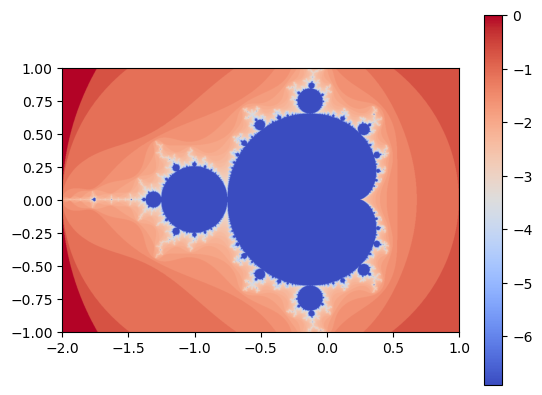

In [10]:
import matplotlib.cm as cm

imshow(-log(data.T), extent=[-2,1,-1,1], cmap=cm.coolwarm)  
colorbar()
show()